In [27]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

In [28]:
c = Case("input.yaml")

UETOOLS-style save successfully restored from .../jupyter/testcase_hires/hires_ngbackg=1e3_last_ii2.hdf5
*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 2.81e+03



In [26]:
com.nxleg[0], com.nysol[0], com.nxcore[0], com.nycore[0]

(array([0, 2]), np.int64(2), array([0, 4]), np.int64(0))

In [29]:
bbb.isbohmcalc

1

In [31]:
bbb.isbohmcalc

1

In [ ]:
bbb.isimpon = 7
bbb.afracs = 1e-4
bbb.ngbackg[1] = 1.e3
c.converge(savefname='hires_ngbackg=1e3', dtreal=1e-9)

In [4]:
c.populate()

*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 3.82e-05



In [3]:
from input import *
from uedge.rundt import *
from uedge.hdf5 import *
import matplotlib.pyplot as plt
from uetools import *
import sys
sys.path.append('utils')

filename = "nc20.hdf5"
hdf5_restore(filename)
bbb.exmain() # recovers solution


Reading UETOOLS style save-file 'nc20.hdf5'.
>>> Save read successfully
*** For isimpon=7, set afracs, not afrac ***
 Reading grid data from gridue.hdf5.hdf5
 TARGET MATERIAL IS      GRAPHITE         
 BOMBARDING IONS ARE     D    
 Grid data read successfully:
     file name:   gridue.hdf5.hdf5
     run-ID:      EFITD    05/08/2002    #110465  3500ms                      
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=      9.835969858487086     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=      8.371364661415534     nfe=      4
 iter=    2 fnrm=      6.434232563502363     nfe=      7
 iter=    3 fnrm=      4.122048560937696     nfe=     10
 iter=    4 fnrm=      2.641271491148117     nfe=     14
 iter=    5 fnrm=      1.692602086205599     nfe=     18
  Updating Jacobian, npe =                      3
 iter=    6 fnrm=      1.084653227879931     nfe=     21
 iter=    7 fnrm=     0.6948898406375795     nfe=     24
 iter=    8 fnrm=

In [19]:
bbb.npltsor=1     #number sources on plates; must be <= 10
# bbb.sputtr = 1
# bbb.sputtrb=1
# Puffs: indices correspond to source # - limited by npltsor

# Outer wall
bbb.igspsorrb[:,0] =   [2,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Puffed species index (PYTHON OR BASIS INDICES?)
bbb.igasrb[:,0]=      [1e1,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Gas currents from outer wall [Amp]
bbb.ygasrb[:,0]=      [0.02,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Location of wall source: origin set by issorlb
bbb.wgasrb[:,0]=      [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Total Cosine widths of source
bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
# bbb.isbcwdt = 1
c.converge(savefname="hires_puff=1e1_ngbackg=1e3", dtreal=1e-9)

*** For isimpon=7, set afracs, not afrac ***
 Reading grid data from /home/sseethalla25/UETOOLS-Reactor/jupyter/testcase_hires/gridue.hdf5.hdf5
 TARGET MATERIAL IS      GRAPHITE         
 BOMBARDING IONS ARE     D    
 Grid data read successfully:
     file name:   /home/sseethalla25/UETOOLS-Reactor/jupyter/testcase_hires/gridue.hdf5.hdf5
     run-ID:      EFITD    05/08/2002    #110465  3500ms                      
 iter=    0 fnrm=      302014.4805903998     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
 Interpolants created; mype =                   -1
*** For isimpon=7, set afracs, not afrac ***
 Reading

RuntimeError: 

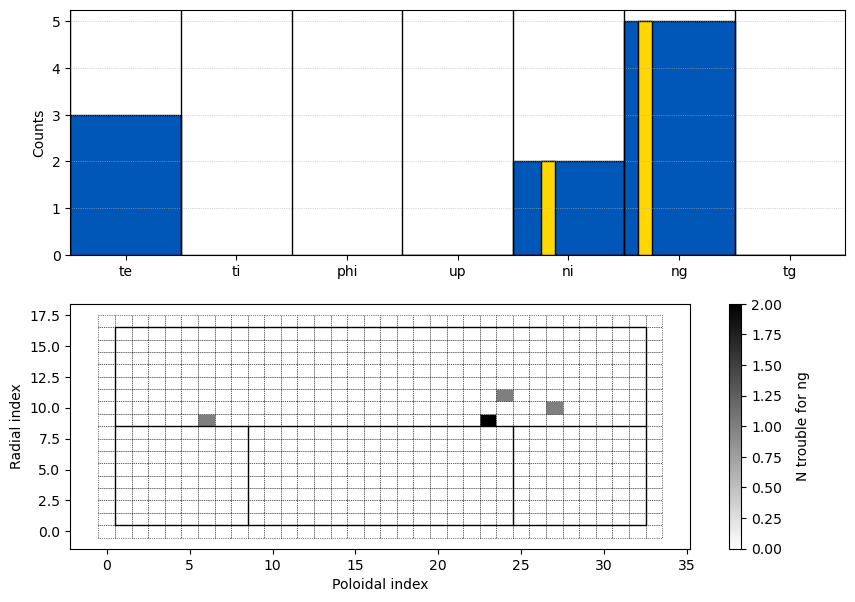

In [17]:
c.solver.failureanalysis('hires_puff_ngbackg=1e3_last_ii2.hdf5', equation='ng', N=slice(-1));

*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 4.38e-05

0.0 9.89398548509899e+16
0


/home/sseethalla25/UETOOLS-Reactor/jupyter/testcase_hires/plot_sinksource.py:95: RuntimeWarning: invalid value encountered in scalar divide
  linewidth=3, alpha = fngysi[ix,s]/maxpuff)


ValueError: alpha (nan) is outside 0-1 range

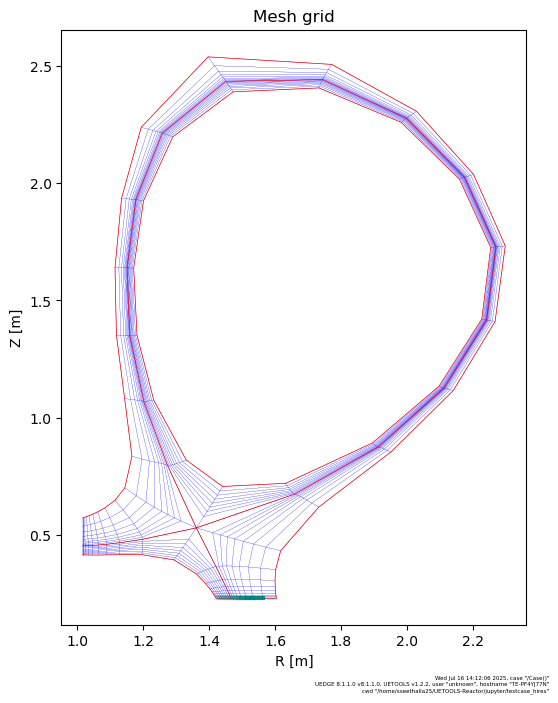

In [17]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c.populate()
plot_sinksource.plot_sinksource(c)


*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.86e-05



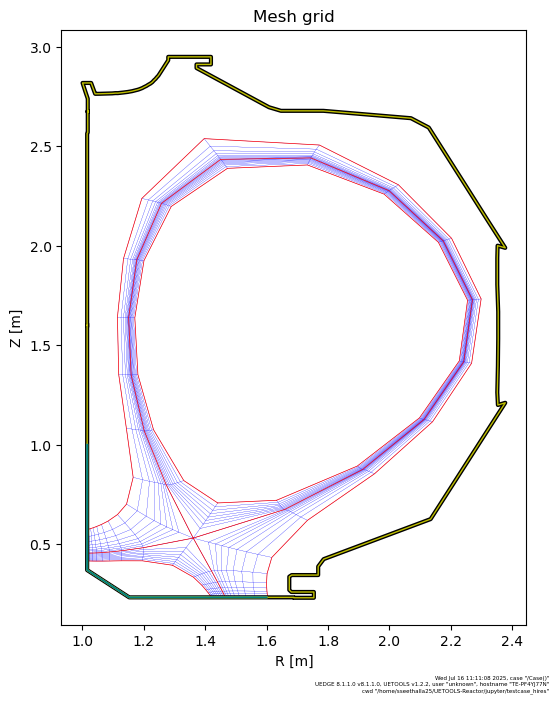

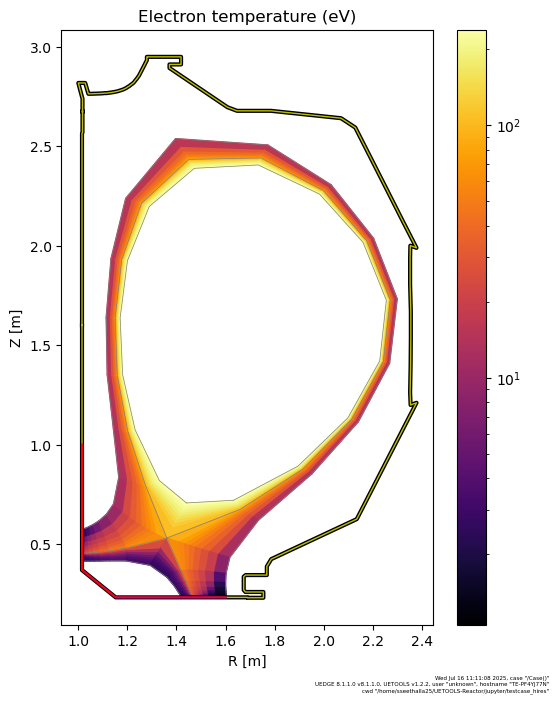

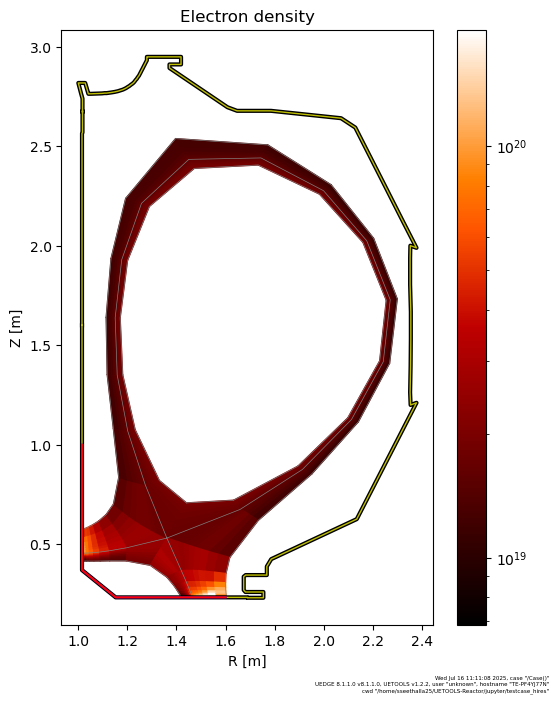

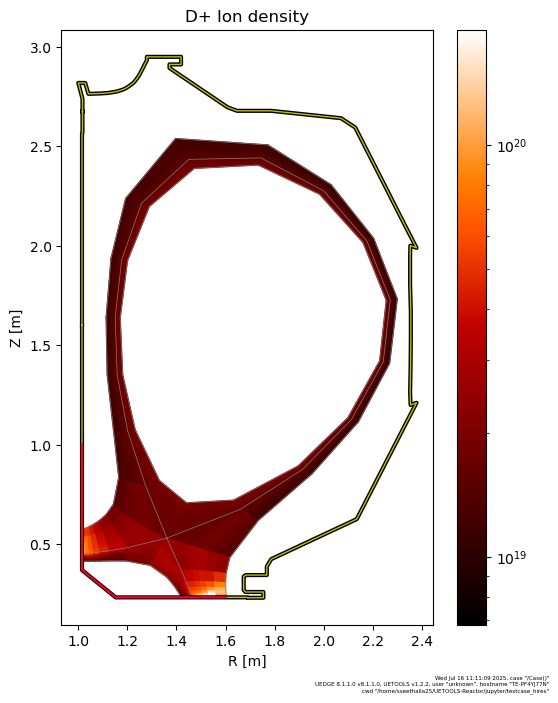

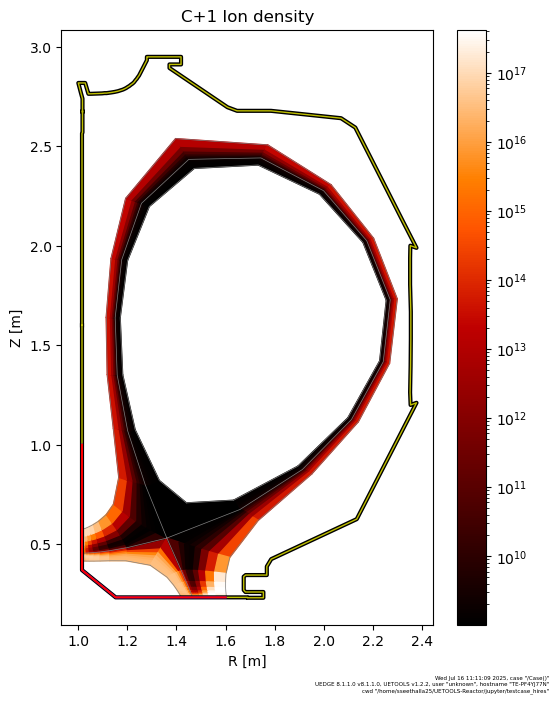

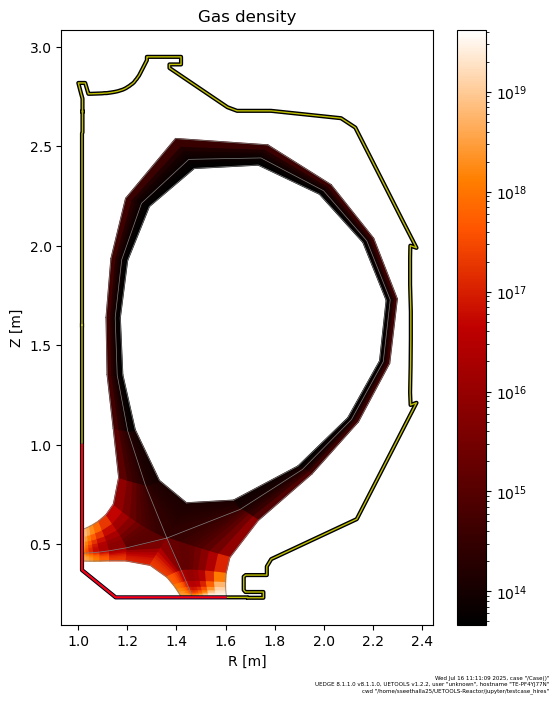

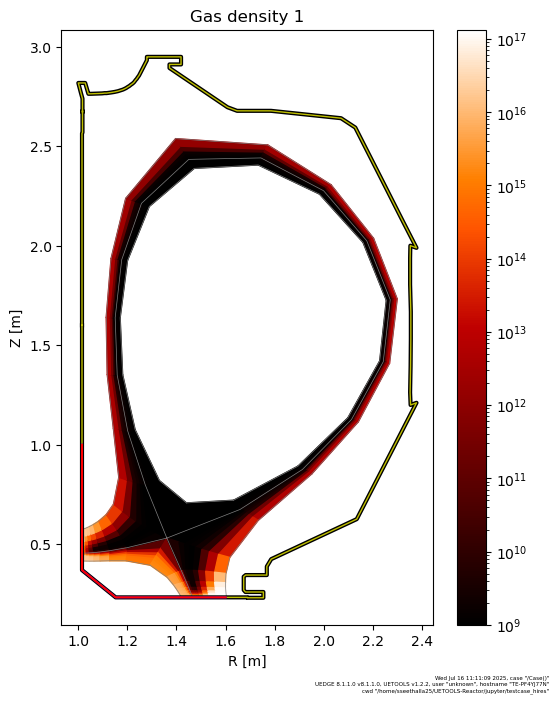

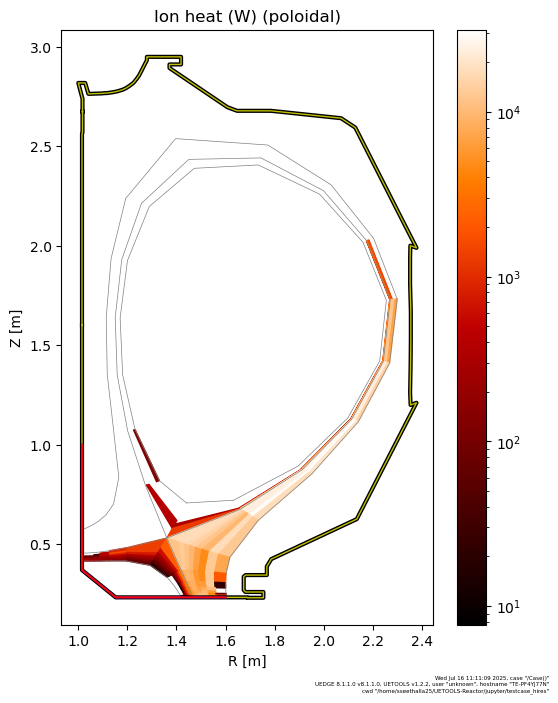

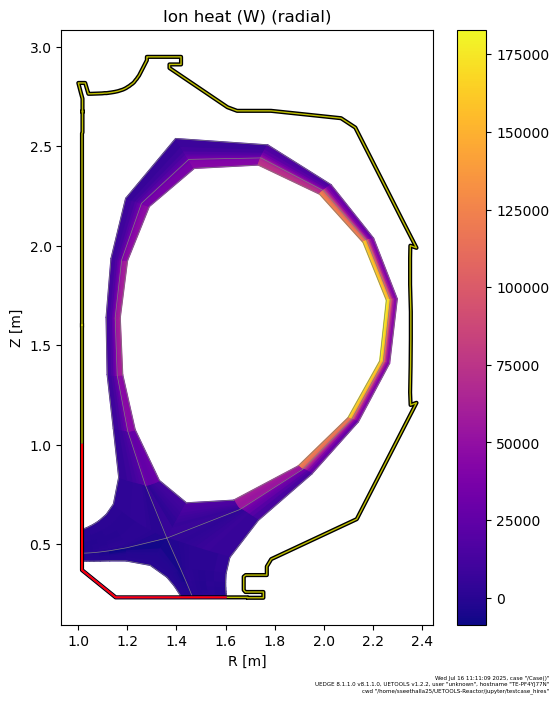

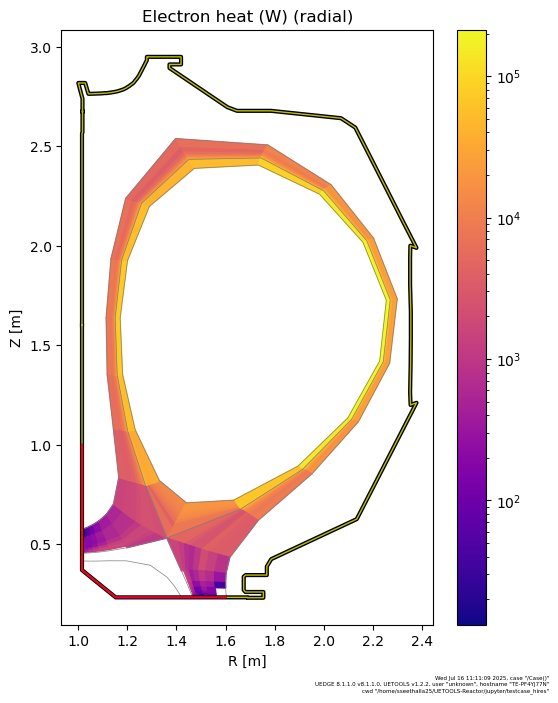

In [12]:
import seaborn as sns
sns.reset_orig()
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
   aspect="auto"
  );
c.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    aspect="auto",
);
c.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    aspect="auto"
);
c.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='D+ Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='gist_heat',
    title='C+1 Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ng[:,:,0], 
    log=True, 
    cmap='gist_heat',
    title='Gas density',
    aspect="auto",
    # y
);
c.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Gas density 1',
    aspect="auto",
    # y
);
c.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (poloidal)',
    aspect="auto",
    # zrange=(1, 1e4)
);
c.plot.mesh(
    bbb.feiy, 
    # log=True, 
    cmap='plasma',
    title='Ion heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3)
);
c.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3) 
);
plt.show()

*** For isimpon=7, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 3.32e-05



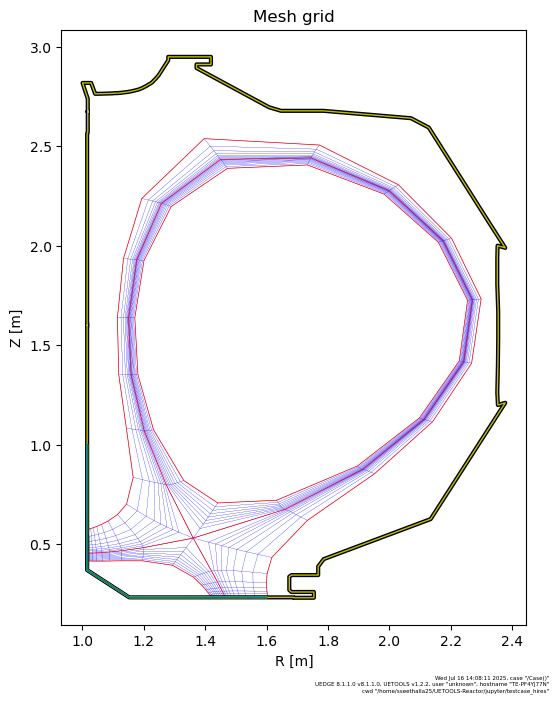

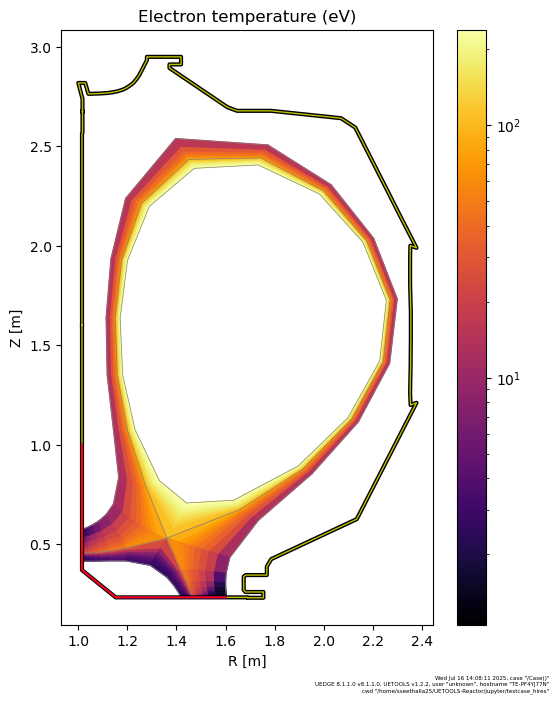

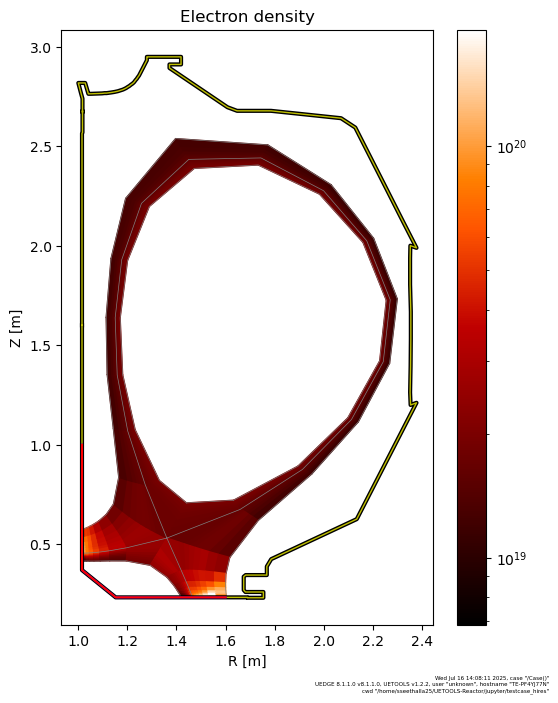

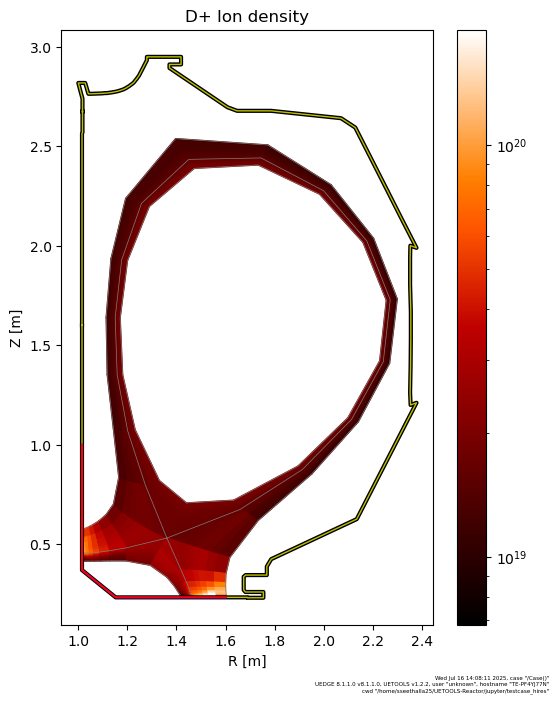

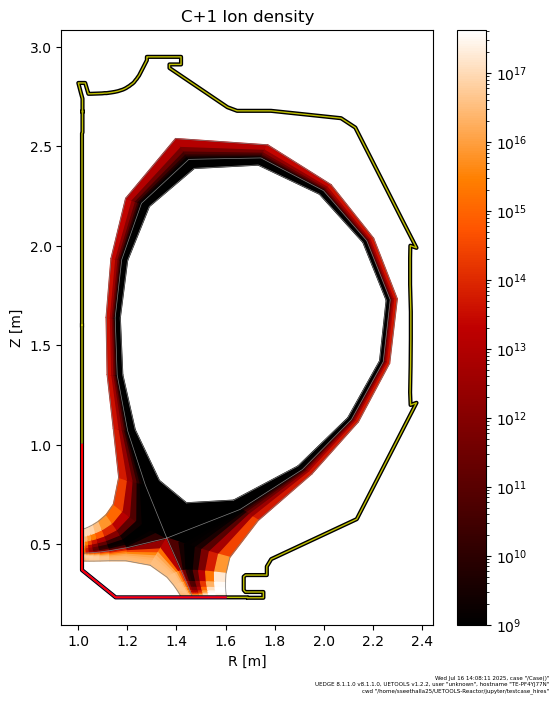

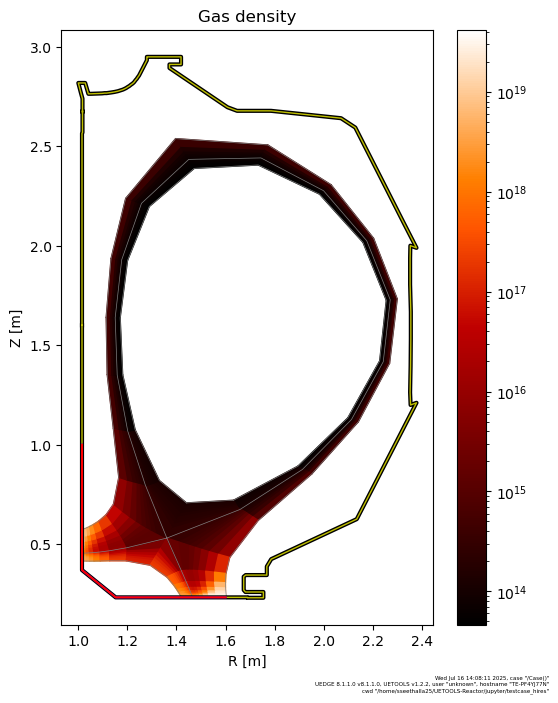

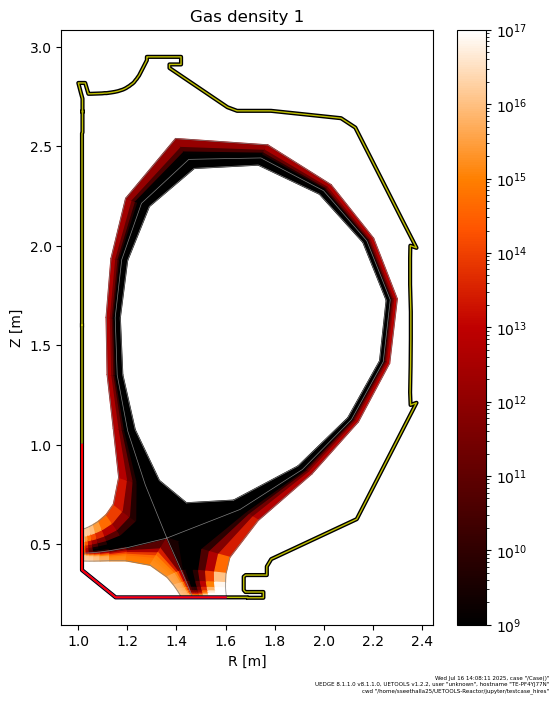

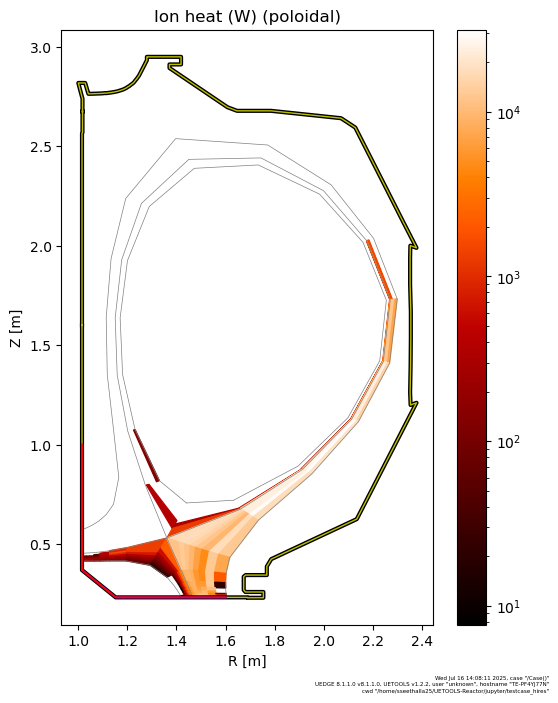

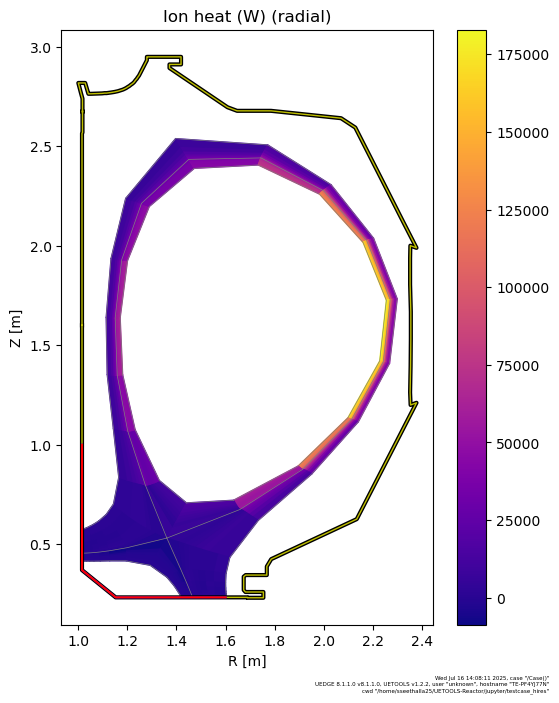

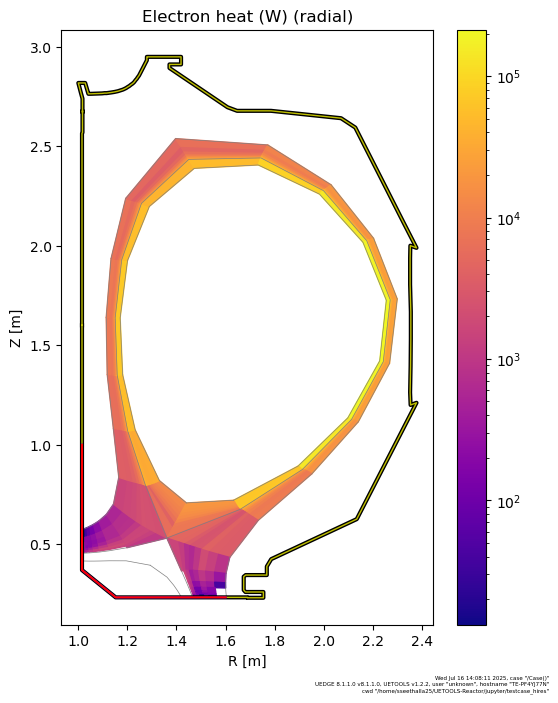

In [15]:
import seaborn as sns
sns.reset_orig()
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
   aspect="auto"
  );
c.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    aspect="auto",
);
c.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    aspect="auto"
);
c.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='D+ Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='gist_heat',
    title='C+1 Ion density',
    aspect="auto",
    # ylim=(50,50.5)
);
c.plot.mesh(
    bbb.ng[:,:,0], 
    log=True, 
    cmap='gist_heat',
    title='Gas density',
    aspect="auto",
    # y
);
c.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Gas density 1',
    aspect="auto",
    zrange=(1e9, 1e17)
    # y
);
c.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (poloidal)',
    aspect="auto",
    # zrange=(1, 1e4)
);
c.plot.mesh(
    bbb.feiy, 
    # log=True, 
    cmap='plasma',
    title='Ion heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3)
);
c.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (radial)',
    aspect="auto",
    # ylim=(2.5,3) 
);
plt.show()